# **Assignment 3. Image Classification Using Convolution Neural Network**

* 使用Convolutional Neural Network (e.g., VGG-like CNN)
* 模型測試(Testing)時使用所有測試資料(10000筆資料)
* 在相同的NN模型參數(epoch, batch size, optimizer, activation function)與約略相同的模型大小之下比較CNN與FC models的分類正確度

In [3]:
# Install old-version Tensorflow if necessary
!pip install tensorflow==2.7.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.7.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


<ipython-input-4-7195efa827f7>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title = "l=" + class_names[int(labels[idx])]
<ipython-input-4-7195efa827f7>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title = "l={}".format(class_names[int(labels[idx])])


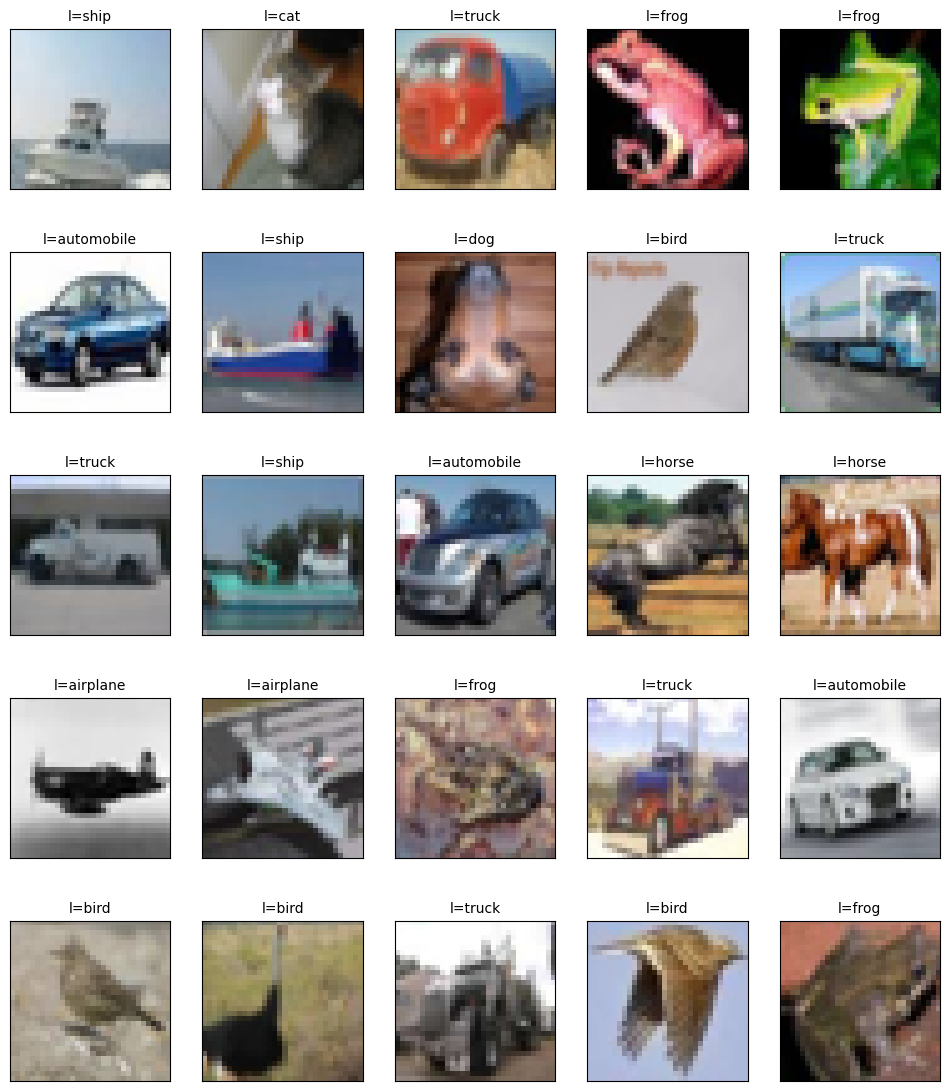

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.datasets import cifar10
np.random.seed(10)

(x_train_image, y_train_label), (x_test_image, y_test_label) = cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def plot_multiimages(images, labels, prediction, idx, num=25):
    plt.gcf().set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx])
        title = "l=" + class_names[int(labels[idx])]
        if len(prediction) > 0:
            title = "l={},p={}".format(class_names[int(labels[idx])], class_names[prediction[idx]])
        else:
            title = "l={}".format(class_names[int(labels[idx])])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()
plot_multiimages(x_train_image, y_train_label, [], 100, 25)

x_train = x_train_image.reshape(len(x_train_image), 32, 32, 3).astype('float32')
x_test = x_test_image.reshape(len(x_test_image), 32, 32, 3).astype('float32')
x_train_norm = x_train/255
x_test_norm = x_test/255
y_TrainOneHot = utils.to_categorical(y_train_label)
y_TestOneHot = utils.to_categorical(y_test_label)

In [5]:
# Build a neural network
#TODO
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
625/625 - 11s - 17ms/step - accuracy: 0.4820 - loss: 1.4469 - val_accuracy: 0.5594 - val_loss: 1.2495
Epoch 2/60
625/625 - 3s - 4ms/step - accuracy: 0.6270 - loss: 1.0699 - val_accuracy: 0.6200 - val_loss: 1.0967
Epoch 3/60
625/625 - 5s - 8ms/step - accuracy: 0.6761 - loss: 0.9278 - val_accuracy: 0.6543 - val_loss: 1.0081
Epoch 4/60
625/625 - 3s - 5ms/step - accuracy: 0.7103 - loss: 0.8322 - val_accuracy: 0.6946 - val_loss: 0.8901
Epoch 5/60
625/625 - 2s - 4ms/step - accuracy: 0.7377 - loss: 0.7495 - val_accuracy: 0.6990 - val_loss: 0.8853
Epoch 6/60
625/625 - 2s - 4ms/step - accuracy: 0.7634 - loss: 0.6797 - val_accuracy: 0.7055 - val_loss: 0.8607
Epoch 7/60
625/625 - 3s - 4ms/step - accuracy: 0.7885 - loss: 0.6039 - val_accuracy: 0.7020 - val_loss: 0.8752
Epoch 8/60
625/625 - 6s - 9ms/step - accuracy: 0.8105 - loss: 0.5369 - val_accuracy: 0.7138 - val_loss: 0.8809
Epoch 9/60
625/625 - 2s - 4ms/step - accuracy: 0.8344 - loss: 0.4718 - val_accuracy: 0.7023 - val_loss: 0.9634

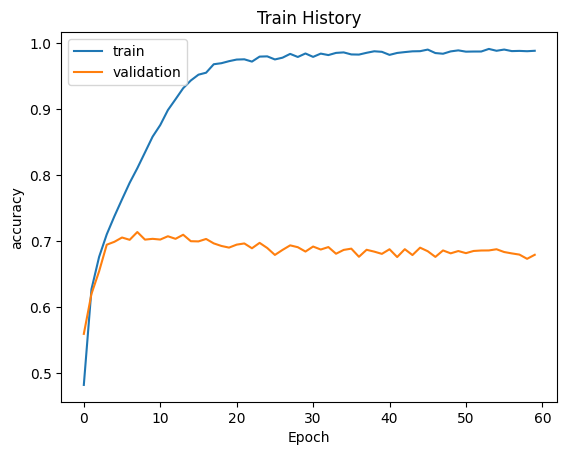

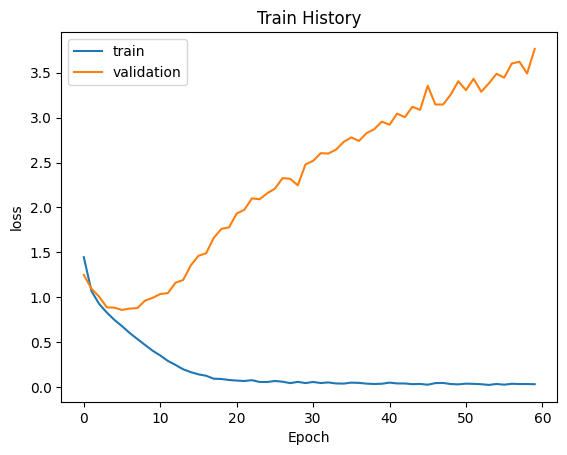

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6795 - loss: 3.7495

	[Info] Accuracy of testing data = 67.6%


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
train_history = model.fit(x=x_train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=60, batch_size=64, verbose=2)

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')

scores = model.evaluate(x_test_norm[0:10000], y_TestOneHot[0:10000])
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

In [5]:
# Build a FCN model
fcn_model = Sequential()

fcn_model.add(Flatten(input_shape=(32, 32, 3)))

fcn_model.add(Dense(172, activation='relu'))
fcn_model.add(Dropout(0.3))
fcn_model.add(Dense(64, activation='relu'))
fcn_model.add(Dense(10, activation='softmax'))

fcn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 172)            │       528,556 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 172)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        11,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 540,278 (2.06 MB)

 Trainable params: 540,278 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
625/625 - 7s - 12ms/step - accuracy: 0.2317 - loss: 2.0578 - val_accuracy: 0.3154 - val_loss: 1.8995
Epoch 2/60
625/625 - 2s - 3ms/step - accuracy: 0.2748 - loss: 1.9427 - val_accuracy: 0.3184 - val_loss: 1.8631
Epoch 3/60
625/625 - 2s - 4ms/step - accuracy: 0.2867 - loss: 1.9163 - val_accuracy: 0.3303 - val_loss: 1.8479
Epoch 4/60
625/625 - 2s - 3ms/step - accuracy: 0.2983 - loss: 1.8905 - val_accuracy: 0.3449 - val_loss: 1.8239
Epoch 5/60
625/625 - 3s - 5ms/step - accuracy: 0.3110 - loss: 1.8633 - val_accuracy: 0.3449 - val_loss: 1.8128
Epoch 6/60
625/625 - 3s - 5ms/step - accuracy: 0.3175 - loss: 1.8488 - val_accuracy: 0.3568 - val_loss: 1.7896
Epoch 7/60
625/625 - 2s - 3ms/step - accuracy: 0.3225 - loss: 1.8359 - val_accuracy: 0.3587 - val_loss: 1.7898
Epoch 8/60
625/625 - 2s - 4ms/step - accuracy: 0.3314 - loss: 1.8231 - val_accuracy: 0.3680 - val_loss: 1.7825
Epoch 9/60
625/625 - 2s - 3ms/step - accuracy: 0.3331 - loss: 1.8172 - val_accuracy: 0.3780 - val_loss: 1.7564


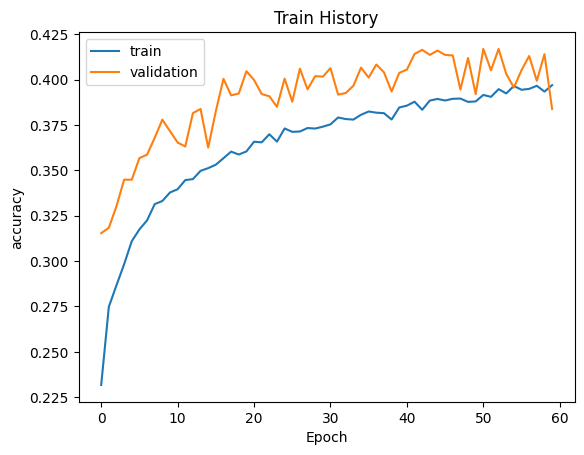

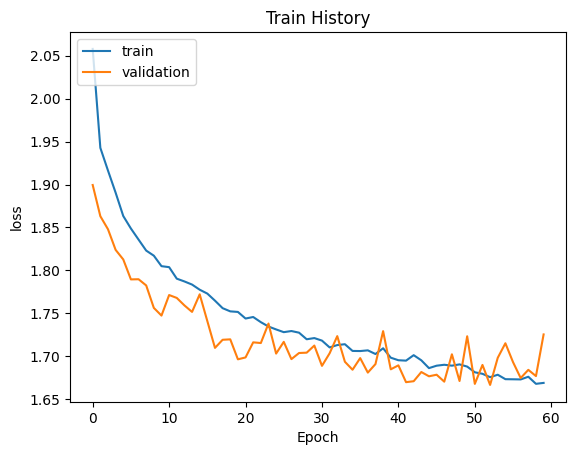

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3805 - loss: 1.7088

	[Info] Accuracy of testing data = 38.2%


In [6]:
fcn_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
fcn_train_history = fcn_model.fit(x=x_train_norm, y=y_TrainOneHot, validation_split=0.2, epochs=60, batch_size=64, verbose=2)

def show_train_history(fcn_train_history, train, validation):
    plt.plot(fcn_train_history.history[train])
    plt.plot(fcn_train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(fcn_train_history, 'accuracy', 'val_accuracy')
show_train_history(fcn_train_history, 'loss', 'val_loss')

scores = fcn_model.evaluate(x_test_norm[0:10000], y_TestOneHot[0:10000])
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))